In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('Train_v2.csv')
test_data = pd.read_csv('Test_v2.csv')

In [3]:
train_data_original = train_data.copy()
test_data_original = test_data.copy()

In [4]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train_data.shape

(23524, 13)

In [6]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [7]:
test_data.shape

(10086, 12)

In [8]:
train_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
test_data.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

### Univariate Data Analysis

In [9]:
categorical_variable_df = train_data.select_dtypes(include=['object'])
categorical_variable_df.columns

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [10]:
categorical_variable_df = categorical_variable_df.drop('uniqueid',axis=1)

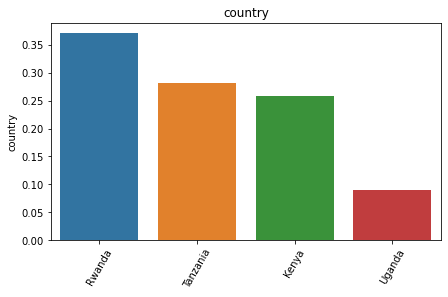

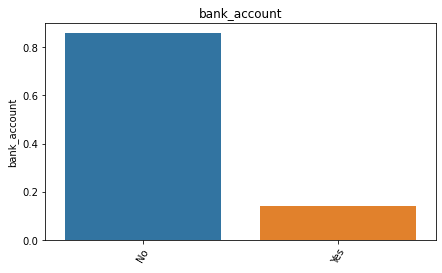

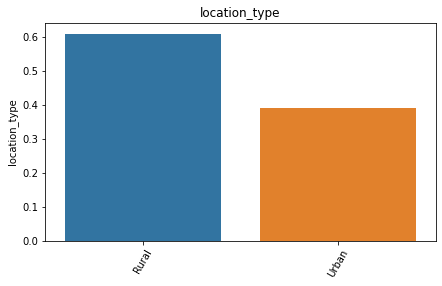

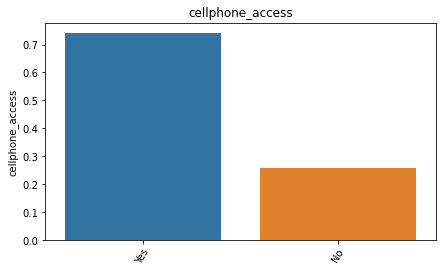

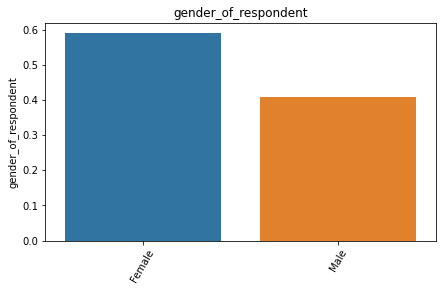

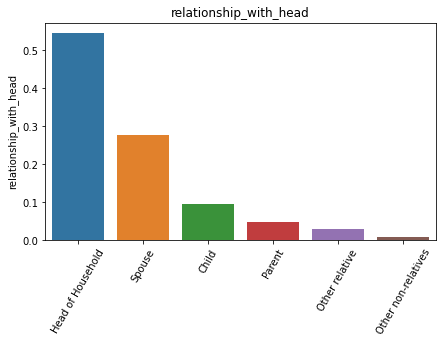

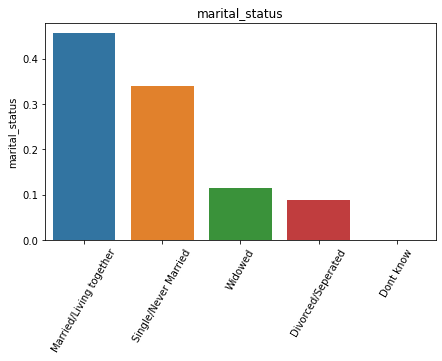

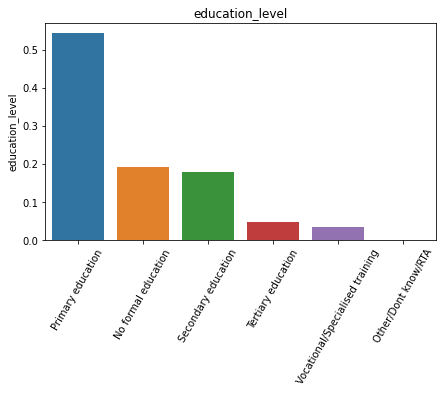

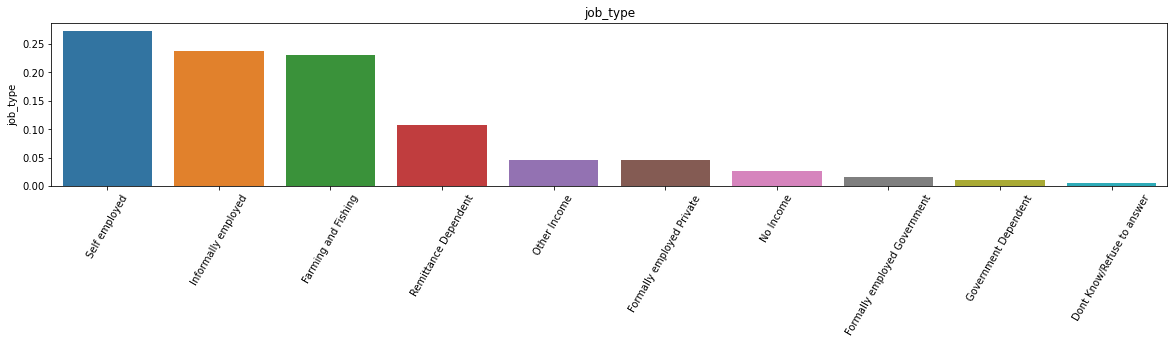

In [11]:
def bar():
    
    for feature in categorical_variable_df:
        cat = train_data[feature].value_counts(normalize=True) # this hould make the adjust the scoop of to the vie
        if len(cat) > 6:
            plt.rcParams["figure.figsize"] = (20,3)
        else:
            plt.rcParams["figure.figsize"] = (7,4)
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 60)

        plt.title(feature)
        plt.show()
bar()

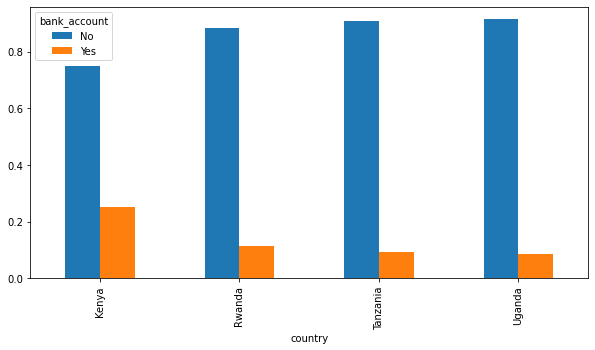

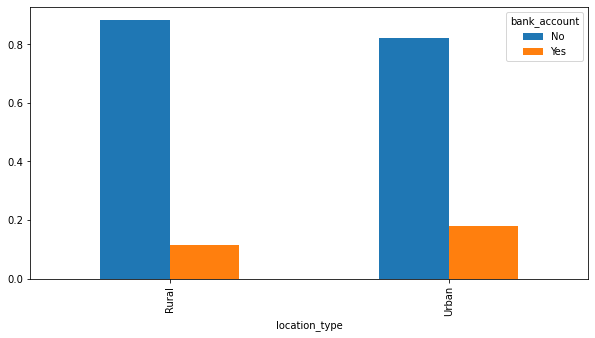

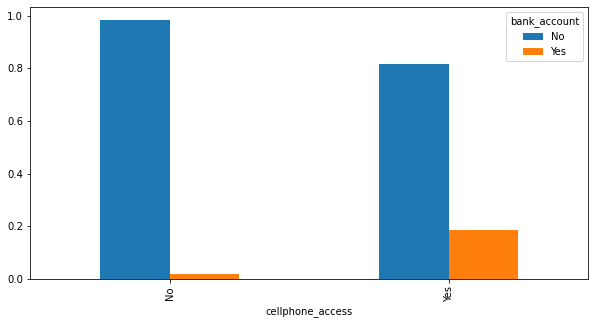

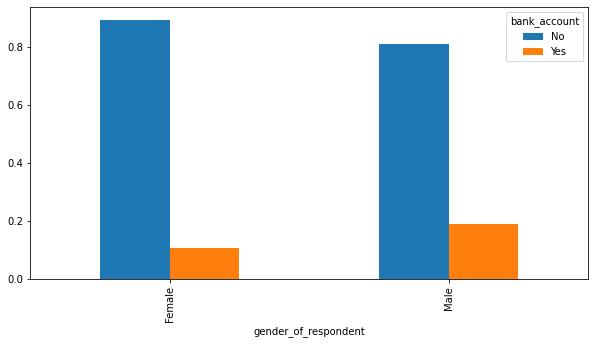

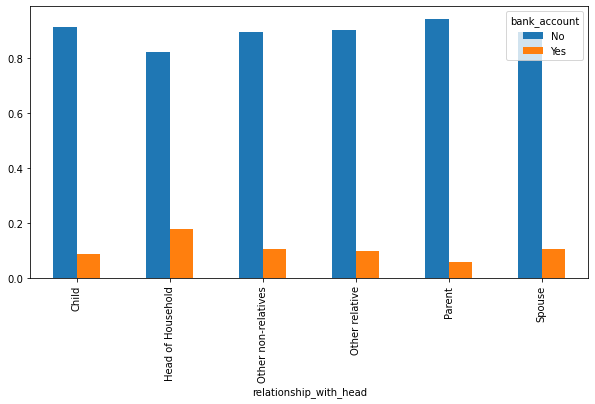

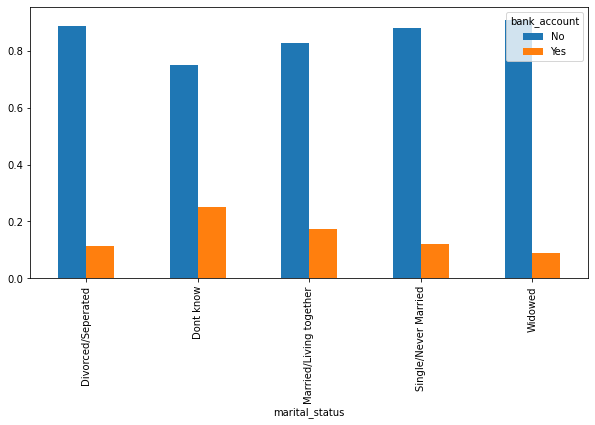

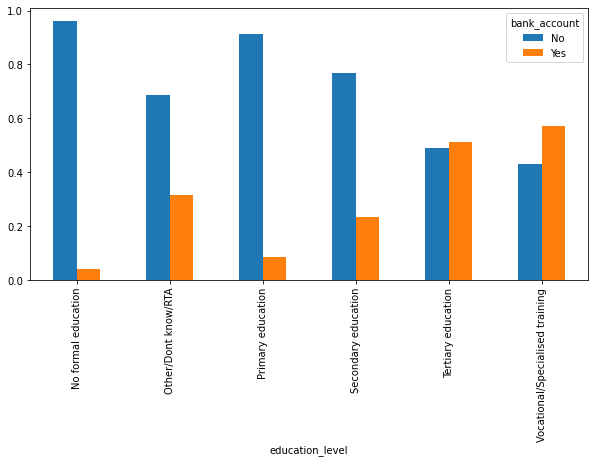

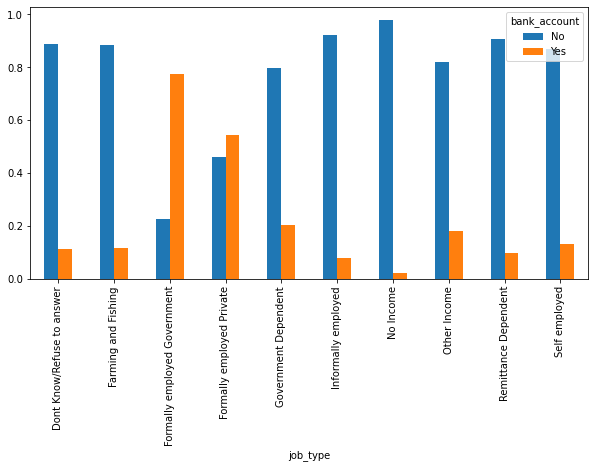

In [13]:
def stacked_bar():
    categorical_variable_df1 = categorical_variable_df.drop('bank_account',axis=1) 
    target = train_data.bank_account
    for feature in categorical_variable_df1:
        cross_tab = pd.crosstab(train_data[feature],target)
        cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,5))
        plt.show()
stacked_bar()

<AxesSubplot:xlabel='country'>

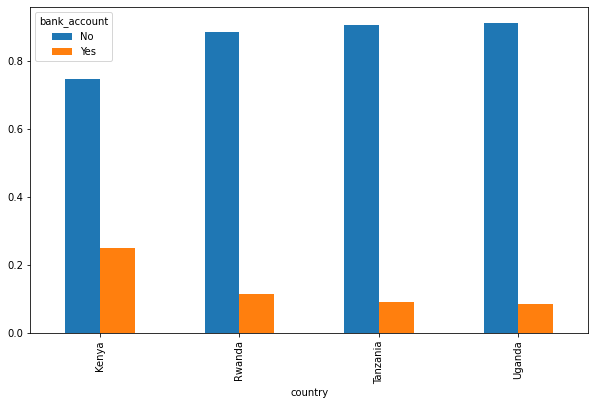

In [14]:
Country=pd.crosstab(train_data['country'],train_data['bank_account']) 
Country.div(Country.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,6))

In [15]:
numerical_variable_df = train_data.select_dtypes(exclude=['object'])
numerical_variable_df.columns

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

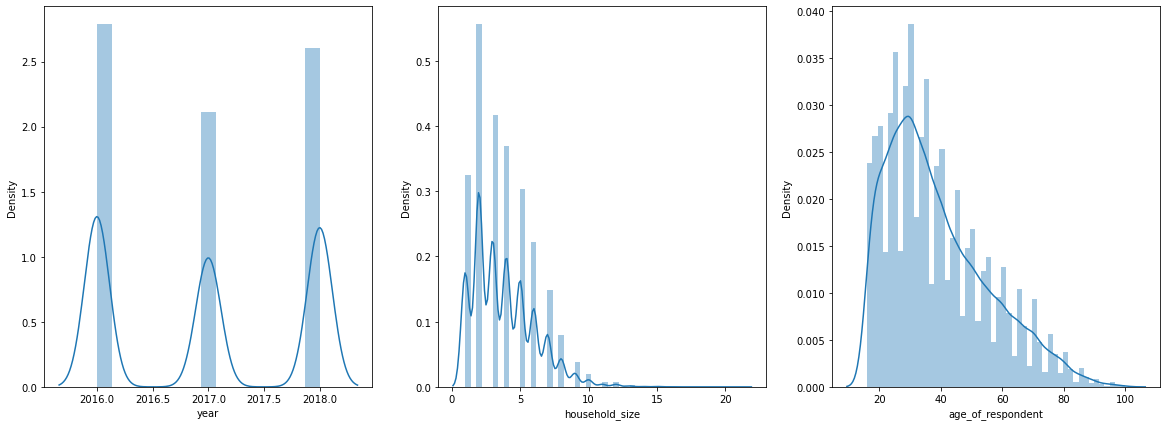

In [16]:
def distributionplots():
    fig, axes = plt.subplots(nrows = 1, ncols = 3)    # axes is 2d array (3x3)
    axes = axes.flatten()         # Convert axes to 1d array of length 9
    fig.set_size_inches(20, 7)

    for ax, col in zip(axes, numerical_variable_df.columns):
        sns.distplot(numerical_variable_df[col], ax = ax)
distributionplots()

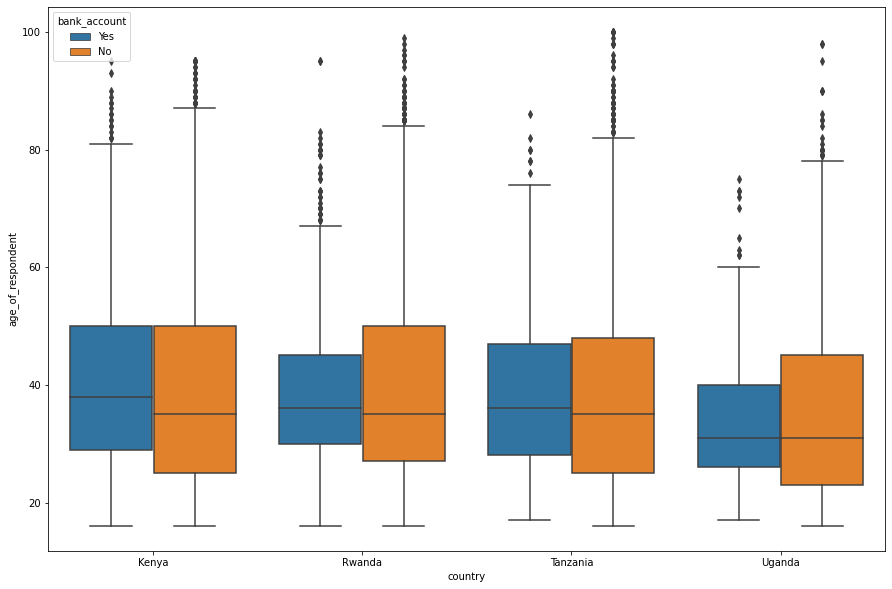

In [17]:
def box1():
    country = train_data.country
    bank = train_data.bank_account
    for feature in numerical_variable_df.columns:
        Feat = train_data[feature]
    
    fig_dims = (15, 10)
    fig, ax = plt.subplots(figsize=fig_dims)
    ax = sns.boxplot(x=country, y=Feat, hue=bank)
box1()

In [18]:
numerical_variable_df1 = numerical_variable_df.drop('year', axis=1)

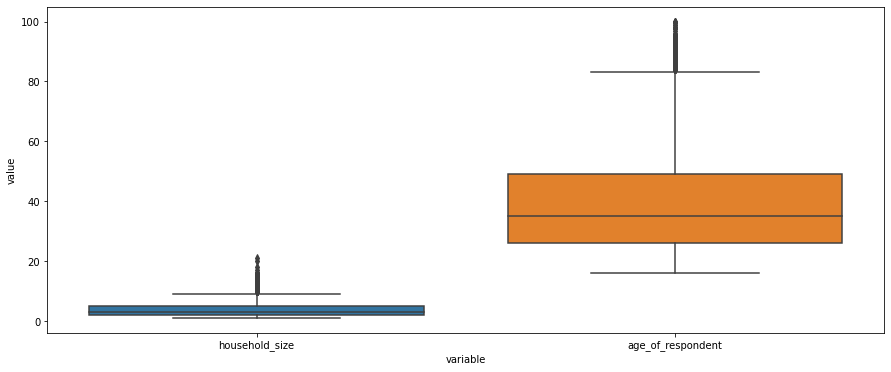

In [19]:
def boxplots():
    fig_dims = (15, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    df = pd.DataFrame(data = numerical_variable_df1, columns = numerical_variable_df1.columns)

    sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df))
    
boxplots()

### Feature Engineering

In [20]:

'''convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 
Few models like logistic regression takes only numeric values as input. 
We will replace N with 0 and Y with 1.'''
train_data['bank_account'].replace('No', 0,inplace=True) 
train_data['bank_account'].replace('Yes', 1,inplace=True)

## Preprocessing 


In [21]:

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
def encode():
    le = LabelEncoder()

    for col in categorical_variable_df:
        train_data[col] = le.fit_transform(train_data[col].astype(str))

    print (train_data.info())
encode()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  int32 
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int32 
 4   location_type           23524 non-null  int32 
 5   cellphone_access        23524 non-null  int32 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int32 
 9   relationship_with_head  23524 non-null  int32 
 10  marital_status          23524 non-null  int32 
 11  education_level         23524 non-null  int32 
 12  job_type                23524 non-null  int32 
dtypes: int32(9), int64(3), object(1)
memory usage: 1.5+ MB
None


In [22]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [23]:
X=train_data.drop(['year', 'uniqueid', 'bank_account'],axis=1)
y=train_data.bank_account


In [24]:
X.shape

(23524, 10)

In [25]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighbors
from sklearn.tree import DecisionTreeClasClassifier sifier
from sklearn.ensemble import RandomForestClassifier, gradient_boosting
import xgboost
from xgboost import XGBClassifier
import yellowbrick
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=9 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16466, 10), (7058, 10), (16466,), (7058,))

LR: 0.873117 (0.050043)
RF: 0.868612 (0.055506)
KNN: 0.866401 (0.057192)
DTC: 0.831288 (0.061237)
LDA: 0.873839 (0.048932)


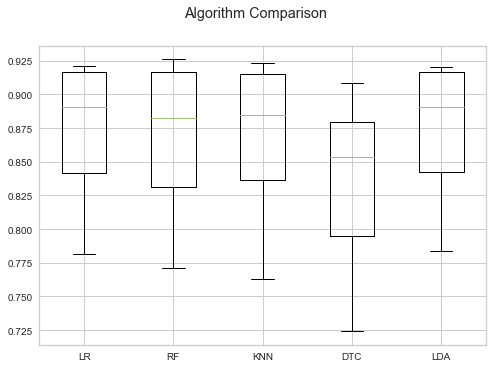

In [27]:
# prepare models
def modeltraining():
    
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
modeltraining()

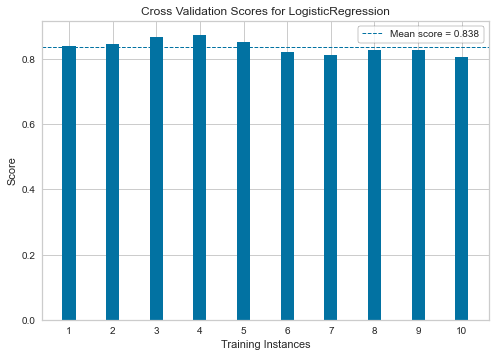

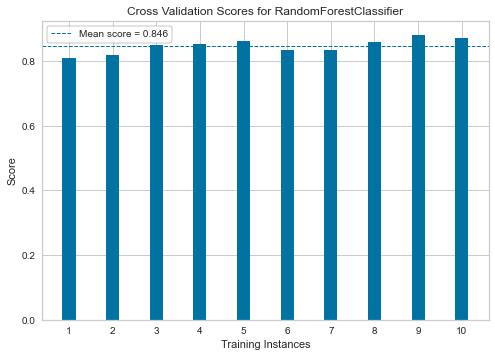

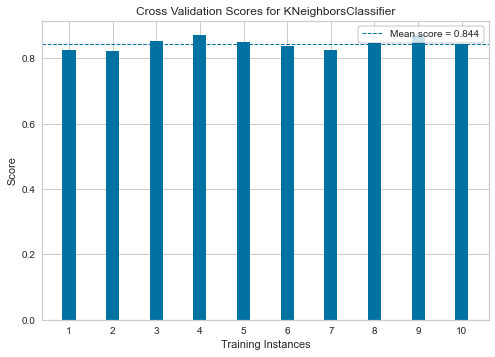

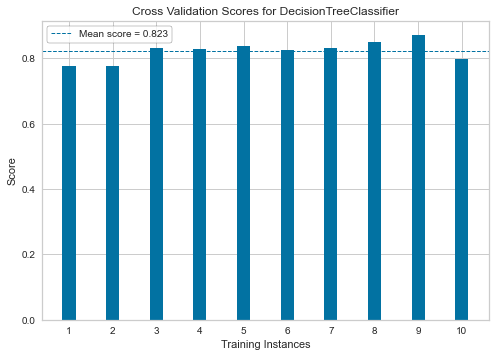

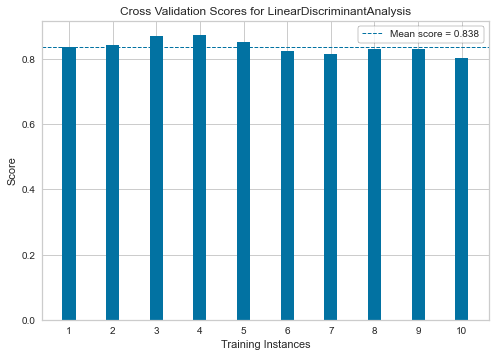

[12:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

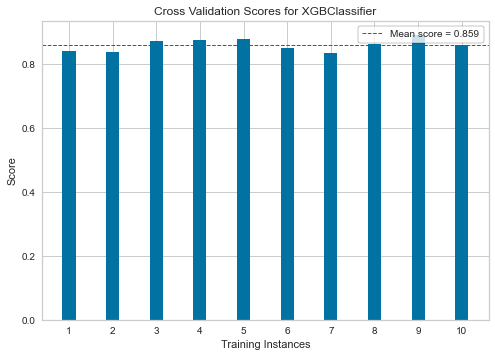

In [28]:
from yellowbrick.model_selection import CVScores
def visualize():
    # Create a cross-validation strategy
    cv = StratifiedKFold(n_splits=10, random_state=42)
    models = []
    models.append(LogisticRegression())
    models.append(RandomForestClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(XGBClassifier())
    for model in models:
        visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
        visualizer.fit(X, y)        # Fit the data to the visualizer
        visualizer.show()
        
visualize()

In [29]:
def balanced_data_models():
    steps = []
    steps.append(('DT', [('over', SMOTE()), ('DT', DecisionTreeClassifier())]))
    steps.append(('RF', [('over', SMOTE()), ('RF', RandomForestClassifier())]))
    steps.append(('KNN', [('over', SMOTE()), ('KNN', KNeighborsClassifier())]))
    steps.append(('LDA', [('over', SMOTE()), ('LDA', LinearDiscriminantAnalysis())]))
    steps.append(('XGB', [('over', SMOTE()), ('XGB', XGBClassifier())]))
    results = []
    names = []
    
    for name, step in steps:
        pipeline = Pipeline(steps=step)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        results.append(scores)
        names.append(name)
        msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
        print(msg)


balanced_data_models()

DT: 0.788953 (0.005798)
RF: 0.811412 (0.008165)
KNN: 0.751134 (0.008408)
LDA: 0.719903 (0.010040)
XGB: 0.800643 (0.007634)


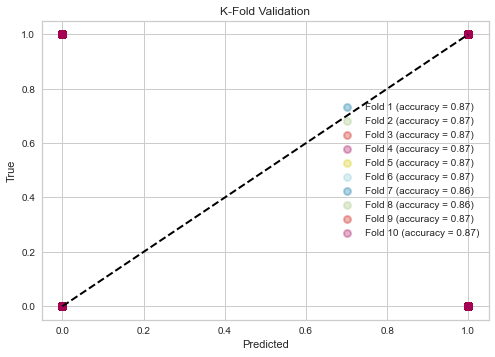

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, accuracy_score
model = RandomForestClassifier()
## K fold validation
scores = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train,
                 y_train).predict(X_test)
    true = y_test
    score = accuracy_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (accuracy = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [35]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state=9 )

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((28296, 10), (12128, 10), (28296,), (12128,))

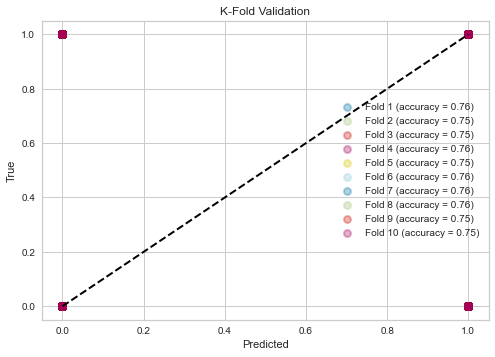

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, accuracy_score
model = RandomForestClassifier()
## K fold validation
scores = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train1, y_train1):
    prediction = model.fit(X_train,
                 y_train).predict(X_test1)
    true = y_test1
    score = accuracy_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (accuracy = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()